## Read in Community Land Model data for Metalearning example
##### Variable: annual mean Leaf Area Index (LAI) spatially averaged over plant functional types (PFTs)

##### Linnia Hawkins 10/23/2023

##### May need to authenticate github:  gh-scoped-creds

### Section 1: Read in and organize data

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#read in CLM simulated Leaf Area Index
# data is the annual maximum LAI, temporally averaged 2003-2014, spatially averaged globally
# 501 perturbed parameter ensemble members (key: ens) the first ensemble member is the default parameterization of CLM
ds = xr.open_dataset('LHC_pmean(TLAImax).nc')
pft_LAI = ds['TLAI_pftavg_annMax_2003-2014']

In [3]:
#get the names of the PFTs (coresponding to pft index in pft_LAI dataset)
pfts = pd.read_csv('pft_names.csv')
pfts = pfts['pft_names']

In [4]:
# organize y-data 
pft_ids = [1,2,3,4,5,6,7,8,10,11,12,13,14] # We don't want to use PFTs 0,9,or 15+
yvar = np.transpose(pft_LAI.isel(pft=pft_ids).values)[1:] # drop the default ensemble member (0)
y_data = pd.DataFrame(yvar,columns=pfts[pft_ids])
y_data

pft_names,needleleaf_evergreen_temperate_tree,needleleaf_evergreen_boreal_tree,needleleaf_deciduous_boreal_tree,broadleaf_evergreen_tropical_tree,broadleaf_evergreen_temperate_tree,broadleaf_deciduous_tropical_tree,broadleaf_deciduous_temperate_tree,broadleaf_deciduous_boreal_tree,broadleaf_deciduous_temperate_shrub,broadleaf_deciduous_boreal_shrub,c3_arctic_grass,c3_non-arctic_grass,c4_grass
0,7.595743,4.316527,4.974660,9.080613,9.622978,6.866199,5.215448,5.334307,1.391821,3.059731,2.473319,2.982796,2.180664
1,5.720441,2.989964,6.559195,7.344661,8.393741,5.211789,3.307613,5.579451,1.078163,2.428635,2.575991,2.320385,1.925748
2,11.608546,8.526909,7.038645,12.463980,15.079522,7.970247,6.201387,7.244705,1.668026,5.046781,4.473083,5.480682,3.200949
3,8.243588,4.975264,4.175718,6.813977,7.914812,6.716591,3.735288,4.166388,2.852085,4.592992,2.831641,4.642539,1.207378
4,3.650196,1.681071,4.055570,4.244097,6.648198,2.769889,0.995314,2.935742,0.299290,1.301584,1.784189,1.778796,1.127035
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2.601123,0.284884,2.713224,5.198671,6.069875,3.019989,1.848207,2.585072,0.586151,2.408195,2.462918,1.144679,2.943759
496,3.312610,1.676897,4.253835,0.120670,4.670471,0.000029,0.245277,2.628180,0.037384,1.140129,2.794198,0.008529,2.639296
497,5.525185,3.398836,3.412705,5.217614,5.754554,5.395892,3.368267,4.504664,2.429900,3.765474,0.755285,3.437076,0.861007
498,5.889696,3.732270,5.402985,5.871191,8.968836,2.568768,0.543198,3.679357,0.454119,2.211172,2.563888,1.185585,1.734289


Text(0, 0.5, 'number of PPE ensemble members')

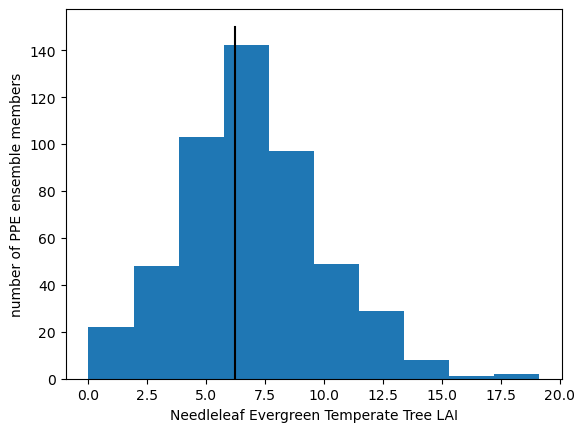

In [5]:
# take a look at the distribution of LAI data for needleleaf evergreen temperate trees (PFT=1)
var = pft_LAI.isel(pft=1).values
plt.hist(var,label = 'PPE LAI')
plt.plot([var[0], var[0]],[0,150],color='k',label='default CLM')
plt.xlabel('Needleleaf Evergreen Temperate Tree LAI')
plt.ylabel('number of PPE ensemble members')

In [6]:
# Read in the parameter sets 
# This is the input X data (CLM parameter settings for each ensemble member)
# Columns are CLM parameters and rows are PPE ensemble members (samples)
# Parameter space was sampled using Latin Hypercube scheme
# each column is normalized
lhckey = 'lhc220926.txt'
df = pd.read_csv(lhckey)
ppe_params = df.drop(columns='member')
ppe_params

,FUN_fracfixers,KCN,a_fix,crit_dayl,d_max,fff,froot_leaf,fstor2tran,grperc,jmaxb0,...,psi50,q10_mr,slatop,soilpsi_off,stem_leaf,sucsat_sf,theta_cj,tpu25ratio,tpuse_sf,wc2wjb0
0,0.778311,0.358026,0.255021,0.401235,0.797847,0.130074,0.938827,0.378388,0.196517,0.624727,...,0.196154,0.275884,0.762778,0.137397,0.113845,0.798198,0.036459,0.393617,0.078962,0.684588
1,0.319329,0.548803,0.630191,0.270024,0.536119,0.679190,0.672215,0.956630,0.934241,0.627186,...,0.816009,0.949813,0.717381,0.743697,0.127340,0.394660,0.093740,0.041084,0.275619,0.878455
2,0.876772,0.210794,0.662125,0.353350,0.140861,0.342557,0.275203,0.747737,0.823775,0.891879,...,0.995087,0.322946,0.474743,0.805385,0.249964,0.168115,0.282747,0.819746,0.840143,0.951915
3,0.412051,0.678111,0.398648,0.330947,0.326188,0.210967,0.327117,0.645703,0.777746,0.897482,...,0.328198,0.042303,0.766334,0.354093,0.916163,0.138359,0.635655,0.448417,0.342799,0.989434
4,0.045135,0.770734,0.298738,0.343413,0.747099,0.207547,0.488125,0.686079,0.459411,0.009303,...,0.602910,0.267256,0.176784,0.507355,0.646416,0.828712,0.466185,0.470941,0.357750,0.909412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.936317,0.335675,0.821711,0.767823,0.330586,0.745789,0.127834,0.424287,0.609700,0.286311,...,0.246081,0.700532,0.681519,0.206475,0.802992,0.453735,0.624163,0.206822,0.441036,0.411448
496,0.955479,0.845082,0.019274,0.324838,0.113533,0.540953,0.150098,0.011721,0.227892,0.006216,...,0.910214,0.993029,0.930575,0.653339,0.750147,0.475151,0.536766,0.994792,0.512649,0.000159
497,0.185969,0.996422,0.422209,0.365048,0.275200,0.320546,0.991583,0.543024,0.037573,0.802632,...,0.346204,0.008894,0.606076,0.406761,0.453041,0.047361,0.765972,0.242643,0.842275,0.731144
498,0.262130,0.912280,0.533934,0.997431,0.907613,0.991805,0.363534,0.886880,0.763445,0.192524,...,0.805913,0.401231,0.865736,0.573305,0.332778,0.352641,0.842942,0.715950,0.353015,0.358052


In [7]:
# Example input for metalearning:
X = ppe_params.values # 32 parameters
y = y_data.values # 13 PFTs

### Section 2: Example of training Gaussian Process emulators for each PFT
##### using ESEm package (which is built on GPflow)

In [15]:
# you may have to run this from the command line
! mamba env update -f environment.yml

Retrieving notices: ...working... done
[+] 0.0s
conda-forge/linux-64 ━╸━━━━━━━━━━━━━━━╸━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.0s
conda-forge/noarch   ━━━━━━━━━━━━╸━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.0s[+] 0.1s
conda-forge/linux-64 ━╸━━━━━━━━━━━━━━━╸━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.1s
conda-forge/noarch   ━━━━━━━━━━━━╸━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.1s[+] 0.2s
conda-forge/linux-64 ━━━━╸━━━━━━━━━━━━━━━╸━━   0.0 B /  ??.?MB @  ??.?MB/s  0.2s
conda-forge/noarch   ━━━━━━━━━╸━━━━━━━━━━━━━   6.7kB /  ??.?MB @  34.1kB/s  0.2s[+] 0.3s
conda-forge/linux-64 ━━━━━━╸━━━━━━━━━━━━━━━━ 216.2kB /  ??.?MB @ 840.6kB/s  0.3s
conda-forge/noarch   ━━━━━━━━━━━╸━━━━━━━━━━━ 776.4kB /  ??.?MB @   2.6MB/s  0.3s[+] 0.4s
conda-forge/linux-64 ━━━━━━━━╸━━━━━━━━━━━━━━ 826.4kB /  ??.?MB @   2.3MB/s  0.4s
conda-forge/noarch   ━━━━━━━━━━━━╸━━━━━━━━━━   1.2MB /  ??.?MB @   3.5MB/s  0.4s[+] 0.5s
conda-forge/linux-64 ━━━━━━━━━━╸━━━━━━━━━━━━ 826.4kB /  ??.?MB @   1.8MB/s  0.5s
conda-forge/noarch   

In [19]:
! conda activate /srv/conda/envs/notebook


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [17]:
# or if that doesn't work (and you already have tensorflow installed):
! pip install esem[gpflow]

In [8]:
from esem import gp_model
from esem.utils import get_random_params
import gpflow
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

2023-10-24 20:26:14.023030: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-24 20:26:14.052162: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


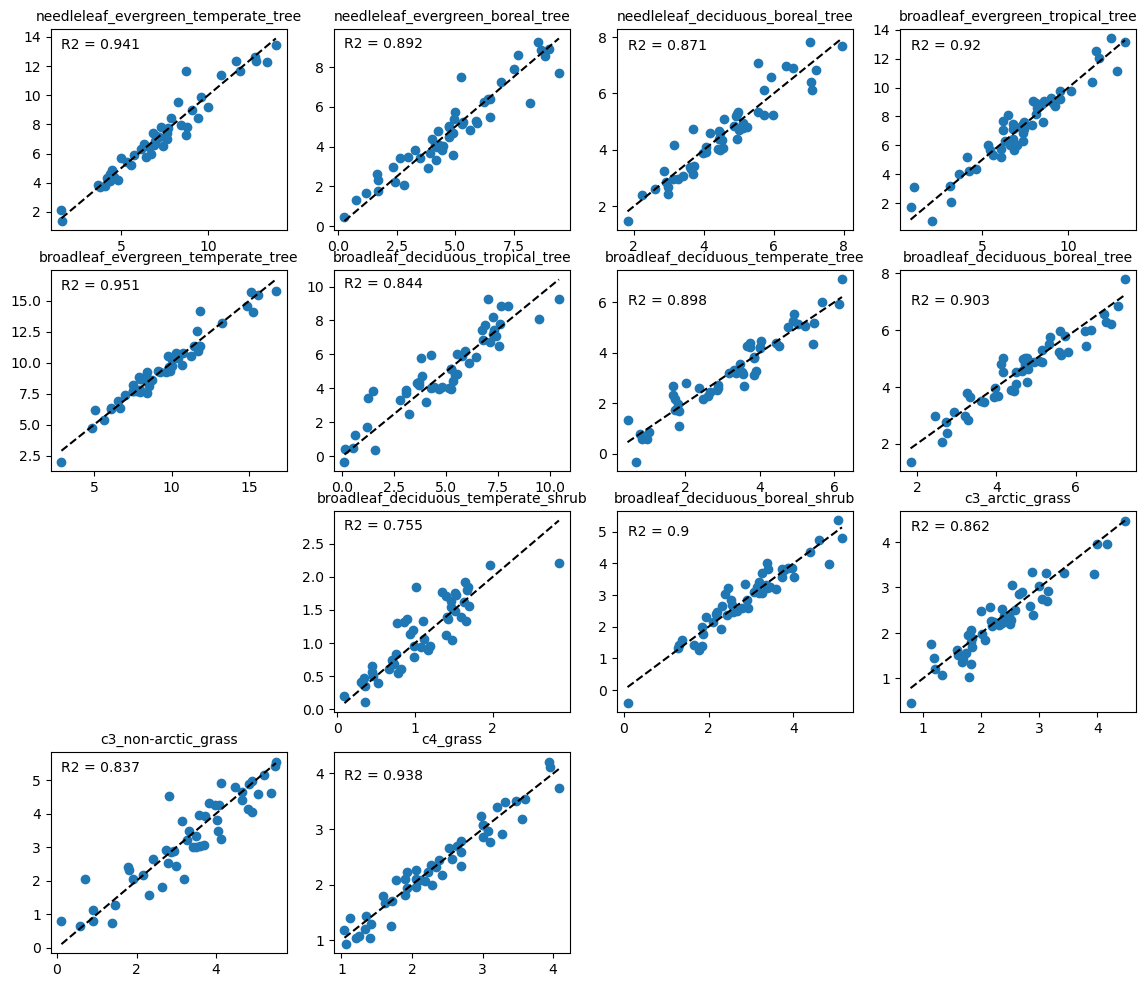

In [9]:
# Train individual GPR emulators for each PFT and save them in a dictionary
plt.figure(figsize=[14,12])
plt.rcParams.update({'font.size': 10})

emulator_dict = {}

for i,pft in enumerate(pft_ids):
    
    var_raw = pft_LAI.isel(pft=pft)[1:].values.reshape(-1, 1)
    Y = scaler.fit_transform(var_raw)

    n_test = 50 # number of ensemble members to withhold for validating emulator

    X_test, X_train = ppe_params[:n_test], ppe_params[n_test:] # no need to randomly sample from a Latin Hypercube
    y_test, y_train = Y[:n_test], Y[n_test:]

    emulator = gp_model(np.array(X_train),np.array(y_train)) # using default kernel (covariance structure)
    emulator.train()

    emulator_dict[pfts[pft]] = emulator
    
    #plot emulator validation
    y_pred, y_pred_var = emulator.predict(X_test.values)
    r2 = r2_score(y_test,y_pred)
    
    y_test_raw = scaler.inverse_transform(y_test)
    y_pred_raw = scaler.inverse_transform(y_pred)

    ax = plt.subplot(4,4,pft)
    ax.plot([min(y_test_raw),max(y_test_raw)],[min(y_test_raw),max(y_test_raw)],c='k',linestyle='--',label='1:1 line')
    ax.scatter(y_test_raw,y_pred_raw)
    ax.text(min(y_test_raw),max(y_test_raw)*0.95,'R2 = '+str(np.round(r2,3)),fontsize=10)
    ax.set_title(pfts[pft],fontsize = 10)

#plt.savefig('PFT_emulator_eval_GM-AM-LAI.png',dpi=200)

### Section 3: use the emulators to predict LAI for other CLM parameter combinations (not in the PPE)

In [77]:
n_params = len(ppe_params.columns)
new_sample = get_random_params(n_params,1000)
np.shape(new_sample)

(1000, 32)

In [84]:
# select the PFT and get emulator (model) from dictionary
p=1
pft = pfts[p]
model = emulator_dict[pft]

In [85]:
y_pred_new, _ = model.predict(new_sample)

In [86]:
var_raw = pft_LAI.isel(pft=p)[1:].values.reshape(-1, 1)
scaler.fit(var_raw)
lai_pred = scaler.inverse_transform(y_pred_new)

(array([  5.,  34., 127., 223., 252., 192., 111.,  34.,  19.,   3.]),
 array([-1.66046784,  0.19463498,  2.04973779,  3.9048406 ,  5.75994342,
         7.61504623,  9.47014904, 11.32525186, 13.18035467, 15.03545748,
        16.8905603 ]),
 <BarContainer object of 10 artists>)

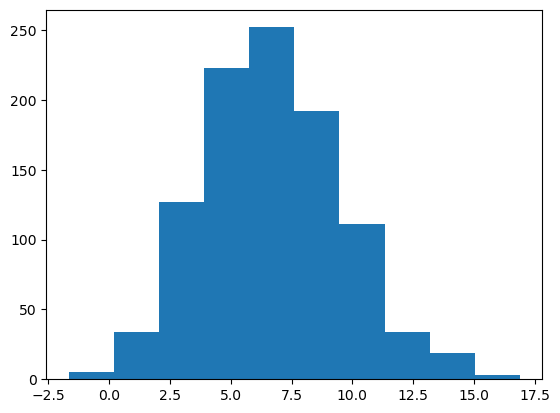

In [87]:
plt.hist(lai_pred)